### SMOTE(Synthetic Minority Oversampling Technique): <br>
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [1]:
from sklearn.datasets import make_classification

In [5]:
#X=independent feature
#y=dependent features
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90], random_state=12)


'''
This line of code is using the make_classification function from the sklearn.datasets module to generate a synthetic dataset for a binary classification problem. Here's a breakdown of the parameters:

n_samples: The total number of samples in the dataset. In this case, there are 1000 samples.

n_redundant: The number of redundant features. In this case, it is set to 0, meaning there are no redundant features.

n_features: The total number of features in the dataset. Here, it is set to 2.

n_clusters_per_class: The number of clusters per class. In this case, it is set to 1, meaning each class forms a single cluster.

weights: The proportions of samples assigned to each class. Here, it is set to [0.90], indicating that 90% of the samples will belong to one class (class 1), and the remaining 10% will belong to the other class (class 0).

random_state: Seed for reproducibility. It ensures that if you run the code again with the same seed, you'll get the same synthetic dataset.

The function returns two values, X and y:

X: The generated feature matrix with shape (n_samples, n_features). In this case, it will be a 2-dimensional array with 1000 rows and 2 columns.

y: The corresponding labels for each sample in X. It will be a 1-dimensional array with 1000 elements, where the values are either 0 or 1, indicating the class membership.

In summary, the code is creating a synthetic dataset with 1000 samples, 2 features, and a class distribution where one class (class 1) has 90% of the samples and the other class (class 0) has 10% of the samples.
'''

In [6]:
X,y

(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [11]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['Target'])

In [14]:
df1

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206
...,...,...
995,-0.712495,-0.880452
996,-2.625830,-2.827891
997,-1.326439,-1.815178
998,-0.833486,-0.514647


In [15]:
df2

,Target
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [18]:
final_df=pd.concat([df1,df2],axis=1)     ## column wise concat

In [19]:
final_df

,f1,f2,Target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [20]:
final_df.head()

,f1,f2,Target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [25]:
final_df['Target'].value_counts()

Target
0    900
1    100
Name: count, dtype: int64

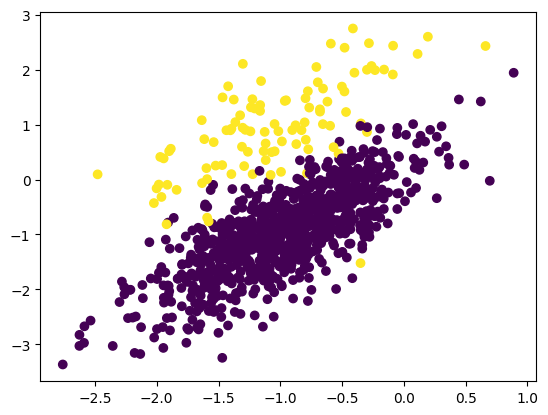

In [26]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['Target'])  #If 'Target' contains categorical values, each category will be represented by a different color.

In [28]:
# pip install imblearn ,, if not installed

In [29]:
from imblearn.over_sampling import SMOTE

In [31]:
## transform the dataset
oversample=SMOTE()   #This line creates an instance of the SMOTE class from the imbalanced-learn library.
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['Target'])

In [33]:
X,y

(            f1        f2
 0    -0.762898 -0.706808
 1    -1.075436 -1.051162
 2    -0.610115 -0.909802
 3    -2.023284 -0.428945
 4    -0.812921 -1.316206
 ...        ...       ...
 1795 -1.229818  1.319371
 1796 -1.303412  1.206240
 1797 -0.757556  1.302518
 1798 -0.612097  1.642782
 1799 -0.948766  1.444435
 
 [1800 rows x 2 columns],
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 1795    1
 1796    1
 1797    1
 1798    1
 1799    1
 Name: Target, Length: 1800, dtype: int32)

In [34]:
X.shape

(1800, 2)

In [35]:
y.shape

(1800,)

In [36]:
y==0    # 0 True 

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: Target, Length: 1800, dtype: bool

In [37]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Target, Length: 900, dtype: int32

In [38]:
len(y[y==0])

900

In [39]:
len(y[y==1])

900

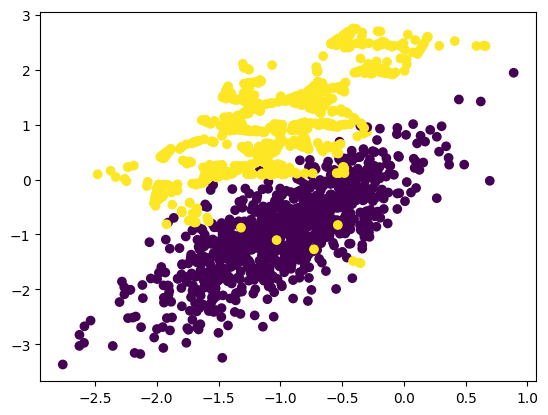

In [42]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['Target'])
oversampled_df=pd.concat([df1,df2],axis=1)
plt.scatter(oversampled_df['f1'],oversampled_df['f2'],c=oversampled_df['Target'])

In [ ]:
## Thanks